# Purma AKhil Sai Teja 
# 210C2030168

#  DL Lab-2 

## Problem Statement
- The increasing prevalence of cyberbullying on social media platforms has become a significant concern, impacting the well-being of individuals and communities. In order to address this issue, it is essential to develop an automated system capable of identifying and classifying instances of cyberbullying

## Output
- Predicting type of cyberbullying  as either not_cyberbullying or , 'gender', 'religion', 'other_cyberbullying','age', 'ethnicity'

## About Dataset
As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere, and the relative anonymity
of the internet makes such personal attacks more difficult to stop than traditional bullying.

On April 15th, 2020, UNICEF issued a warning in response to the increased risk of cyberbullying during the COVID-19 pandemic due to widespread school closures, increased screen time, and decreased face-to-face social interaction. The statistics of cyberbullying are outright alarming: 36.5% of middle and high school students have felt cyberbullied and 87% have observed cyberbullying, with effects ranging from decreased academic performance to depression to suicidal thoughts.

In light of all of this, this dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

Age;
Ethnicity;
Gender;
Religion;
Other type of cyberbullying;
Not cyberbullying
The data has been balanced in order to contain ~8000 of each class
- https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification


## Methodology

### Obtaining Dataset

### Data Preprocessing
  - Special Characters removal
  - Stemming and Lemitization
  - Tokenization
  - word 2 vec using Gensim library
  
### Creating embedding matrix

### Finding words position in vocabulary and applying paddding

### Encoding Cyberbullying_type 

### Splitting padded data and encoded data into training and testing

### Model Building
  - Vanilla rnn
  - LSTM
  - GRU
  - Bidirectional LSTM
  
###  Model Comparison


In [422]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Activation,LSTM,GRU,Flatten
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Activation
from tqdm.auto import tqdm
import time
from collections import Counter

In [424]:
df=pd.read_csv("cyberbullying_tweets.csv")
df


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [425]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [426]:
df.shape

(47692, 2)

## 1 Checking Null values

In [427]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [428]:
df.shape

(47692, 2)

In [429]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [430]:
df.duplicated().sum()

36

In [431]:
df[df.duplicated()]

,tweet_text,cyberbullying_type
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
3833,But you all respect him....Pete hasn't read tw...,not_cyberbullying
3939,This is the opportunity to prove ourselves lik...,not_cyberbullying
5684,Strategicscoring should be classed as cheating...,not_cyberbullying
6975,"If we're at the bottom of the leaderboard, we'...",not_cyberbullying
7227,It wouldn't be fair. Kat knows NOTHING of fair...,not_cyberbullying
7278,@TVWEEKmag: There is only 1 way to stay in the...,not_cyberbullying
7822,@Ima_TV_Junkie: What the hell were Annie and L...,not_cyberbullying
9672,@victorymonk: #sorryitsaboy joke means more bo...,gender
9835,@thisonesakillaa: In my opinion? All jokes are...,gender


### EDA 

In [432]:
all_texts=' '.join(df['tweet_text'])
all_texts=re.sub('[^a-zA-Z0-9?$%]',' ',all_texts)
words=all_texts.split()
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]


In [433]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 20951),
 ('school', 8287),
 ('like', 5500),
 ('high', 4866),
 ('dumb', 4565),
 ('bullied', 4561),
 ('people', 4480),
 ('RT', 4321),
 ('rape', 3853),
 ('nigger', 3796),
 ('gay', 3550),
 ('fuck', 3529),
 ('u', 3512),
 ('bully', 3394),
 ('http', 3307),
 ('jokes', 3255),
 ('co', 3251),
 ('one', 3065),
 ('You', 2976),
 ('amp', 2975),
 ('girls', 2681),
 ('The', 2656),
 ('ass', 2607),
 ('girl', 2603),
 ('get', 2548),
 ('know', 2271),
 ('black', 2204),
 ('It', 2120),
 ('would', 2059),
 ('think', 2046),
 ('white', 1858),
 ('Muslims', 1820),
 ('joke', 1820),
 ('Muslim', 1776),
 ('idiot', 1659),
 ('say', 1648),
 ('bitch', 1644),
 ('got', 1623),
 ('women', 1582),
 ('FUCK', 1579),
 ('make', 1537),
 ('call', 1512),
 ('called', 1475),
 ('bullies', 1474),
 ('right', 1471),
 ('even', 1465),
 ('And', 1441),
 ('go', 1411),
 ('see', 1407),
 ('A', 1395),
 ('Christian', 1387),
 ('woman', 1381),
 ('time', 1376),
 ('shit', 1362),
 ('want', 1355),
 ('never', 1354),
 ('fucking', 1350),
 ('MKR', 1334),
 (

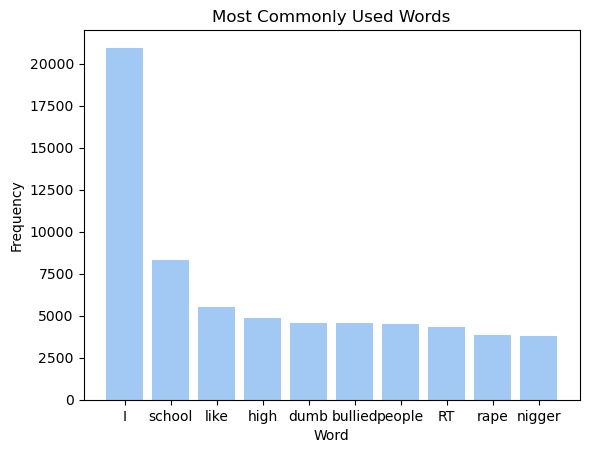

In [434]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

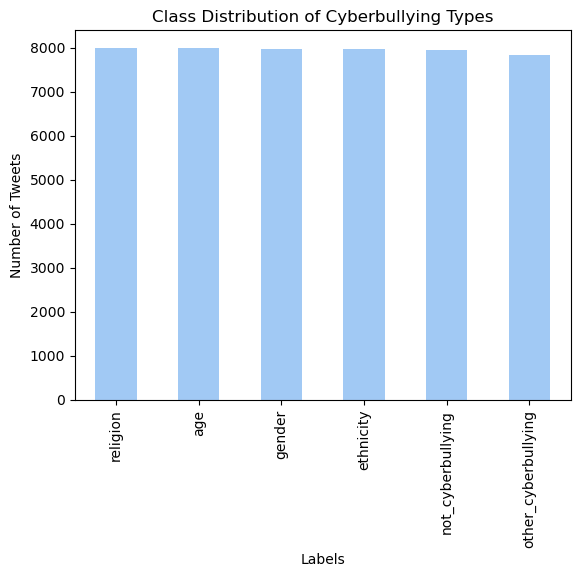

In [435]:
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

## Data Preprocessing

In [436]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    return words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [437]:
from tqdm.auto import tqdm
import time

tqdm.pandas()

df['cleaned_text'] = df['tweet_text'].progress_apply(clean_text)

print(df.head())


  0%|          | 0/47692 [00:00<?, ?it/s]

                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                        cleaned_text  
0           [word, katandandr, food, crapilici, mkr]  
1  [aussietv, white, mkr, theblock, imacelebritya...  
2  [xochitlsuckkk, classi, whore, red, velvet, cu...  
3  [jason, gio, meh, p, thank, head, concern, ano...  
4  [rudhoeenglish, isi, account, pretend, kurdish...  


In [438]:
df

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"[word, katandandr, food, crapilici, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,"[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,"[xochitlsuckkk, classi, whore, red, velvet, cu..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"[jason, gio, meh, p, thank, head, concern, ano..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,"[rudhoeenglish, isi, account, pretend, kurdish..."
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,"[black, ppl, expect, anyth, depend, anyth, yet..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,"[turner, withhold, disappoint, turner, call, c..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,"[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,"[yea, fuck, rt, therealexel, your, nigger, fuc..."


## Word 2 Vec

In [439]:
from gensim.models import Word2Vec


model = Word2Vec(sentences=df['cleaned_text'], vector_size=300, window=5, min_count=1, workers=4, sg=1)


model.save("word2vec.model")

In [440]:

df

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"[word, katandandr, food, crapilici, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,"[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,"[xochitlsuckkk, classi, whore, red, velvet, cu..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"[jason, gio, meh, p, thank, head, concern, ano..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,"[rudhoeenglish, isi, account, pretend, kurdish..."
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,"[black, ppl, expect, anyth, depend, anyth, yet..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,"[turner, withhold, disappoint, turner, call, c..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,"[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,"[yea, fuck, rt, therealexel, your, nigger, fuc..."


In [441]:
model = Word2Vec.load("word2vec.model")

In [442]:
word_vector = model.wv['word']

In [443]:
similar_words = model.wv.most_similar('fuck', topn=5)
similar_words

[('ass', 0.8776989579200745),
 ('smh', 0.8738236427307129),
 ('nigger', 0.8588968515396118),
 ('cracker', 0.8474707007408142),
 ('fuckin', 0.8446600437164307)]

In [444]:
model.wv.index_to_key


['bulli',
 'school',
 'fuck',
 'like',
 'nigger',
 'joke',
 'girl',
 'dumb',
 'high',
 'muslim',
 'peopl',
 'rape',
 'gay',
 'u',
 'rt',
 'call',
 'get',
 'one',
 'idiot',
 'co',
 'http',
 'say',
 'make',
 'black',
 'amp',
 'ass',
 'mkr',
 'go',
 'islam',
 'know',
 'bitch',
 'think',
 'white',
 'christian',
 'right',
 'would',
 'want',
 'use',
 'got',
 'time',
 'see',
 'women',
 'look',
 'hate',
 'support',
 'even',
 'shit',
 'never',
 'thing',
 'terrorist',
 'ur',
 'woman',
 'year',
 'need',
 'still',
 'realli',
 'tri',
 'love',
 'first',
 'man',
 'terror',
 'said',
 'mean',
 'talk',
 'obama',
 'good',
 'kill',
 'femal',
 'kid',
 'friend',
 'us',
 'guy',
 'also',
 'stop',
 'anyth',
 'radic',
 'back',
 'way',
 'racist',
 'take',
 'day',
 'lol',
 'men',
 'tell',
 'sexist',
 'twitter',
 'person',
 'made',
 'come',
 'human',
 'someon',
 'name',
 'bad',
 'word',
 'let',
 'feel',
 'tayyoung',
 'everi',
 'funni',
 'much',
 'live',
 'racism',
 'na',
 'middl',
 'r',
 'world',
 'give',
 'mani',

In [445]:
len(model.wv.index_to_key)

47369

## Create an embedding matrix

In [446]:

embedding_matrix = np.zeros((len(model.wv), 300))
for i, word in enumerate(model.wv.index_to_key):
    embedding_matrix[i] = model.wv[word]


In [447]:
embedding_matrix.shape

(47369, 300)

In [448]:
embedding_matrix

## there are total 47369 unique  words  for bulli  this  is the vector -0.10452877,  0.26967829,  0.13257663, ..., -0.29167974,
         ### 0.14501591, -0.40985987

array([[ 0.12996945,  0.58468258, -0.18727219, ..., -0.23001562,
         0.38362408, -0.33055365],
       [ 0.04519251,  0.5116623 , -0.09712613, ..., -0.34990531,
         0.20559049, -0.4066287 ],
       [ 0.36505198,  0.03833671,  0.07738193, ...,  0.11835576,
         0.09535789, -0.01720672],
       ...,
       [ 0.04480699,  0.0045046 ,  0.01459029, ..., -0.02436158,
        -0.01520087, -0.023389  ],
       [ 0.04178248,  0.01712346,  0.00504572, ..., -0.03412911,
        -0.00060549, -0.02082785],
       [ 0.05027826,  0.01588543,  0.00561714, ..., -0.02242328,
        -0.02316193,  0.01523834]])

## Label Encoding

In [449]:
from sklearn.preprocessing import LabelEncoder
# Encode the labels
label_encoder = LabelEncoder()
df['cyberbullying_type'] = label_encoder.fit_transform(df['cyberbullying_type'])

In [450]:
df['cyberbullying_type'].unique()

array([3, 2, 5, 4, 0, 1])

In [451]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df['cyberbullying_type'])
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [452]:
df.drop('tweet_text',axis=1)

,cyberbullying_type,cleaned_text
0,3,"[word, katandandr, food, crapilici, mkr]"
1,3,"[aussietv, white, mkr, theblock, imacelebritya..."
2,3,"[xochitlsuckkk, classi, whore, red, velvet, cu..."
3,3,"[jason, gio, meh, p, thank, head, concern, ano..."
4,3,"[rudhoeenglish, isi, account, pretend, kurdish..."
...,...,...
47687,1,"[black, ppl, expect, anyth, depend, anyth, yet..."
47688,1,"[turner, withhold, disappoint, turner, call, c..."
47689,1,"[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,1,"[yea, fuck, rt, therealexel, your, nigger, fuc..."


## Word position in vocabulary

In [453]:
word_to_index = model.wv.key_to_index

In [454]:
def indexfinder(row):
    sentence=[]
    for word in row:
        index = word_to_index[word]
        sentence.append(index)
        
    return sentence
        


df["sequences"]=df["cleaned_text"].apply(indexfinder)


In [455]:
df

,tweet_text,cyberbullying_type,cleaned_text,sequences
0,"In other words #katandandre, your food was cra...",3,"[word, katandandr, food, crapilici, mkr]","[93, 2199, 645, 18603, 26]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,3,"[aussietv, white, mkr, theblock, imacelebritya...","[18595, 32, 26, 18119, 8421, 169, 18107, 5026,..."
2,@XochitlSuckkks a classy whore? Or more red ve...,3,"[xochitlsuckkk, classi, whore, red, velvet, cu...","[18675, 2005, 1216, 776, 9832, 4461]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3,"[jason, gio, meh, p, thank, head, concern, ano...","[2145, 4838, 3236, 164, 174, 222, 859, 176, 71..."
4,@RudhoeEnglish This is an ISIS account pretend...,3,"[rudhoeenglish, isi, account, pretend, kurdish...","[10673, 112, 365, 820, 2824, 365, 3, 28, 191]"
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1,"[black, ppl, expect, anyth, depend, anyth, yet...","[23, 156, 513, 74, 1441, 74, 267, 370, 2038, 1..."
47688,Turner did not withhold his disappointment. Tu...,1,"[turner, withhold, disappoint, turner, call, c...","[7353, 9648, 1414, 7353, 15, 1390, 8933, 33660..."
47689,I swear to God. This dumb nigger bitch. I have...,1,"[swear, god, dumb, nigger, bitch, got, bleach,...","[756, 120, 7, 4, 30, 38, 2867, 311, 40987, 572..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,"[yea, fuck, rt, therealexel, your, nigger, fuc...","[977, 2, 14, 15415, 1413, 4, 2, 1437, 2, 7, 4]"


## Selecting padding parameter

In [456]:
lengths=[]
for text in df['cleaned_text']:
    x=len(text)
    
    lengths.append(x)

In [457]:
Counter(lengths)

Counter({5: 1871,
         11: 2974,
         6: 2043,
         9: 2760,
         14: 2535,
         10: 2881,
         7: 2327,
         4: 1559,
         2: 756,
         18: 1134,
         8: 2549,
         15: 2101,
         12: 2910,
         13: 2858,
         3: 1173,
         21: 1015,
         23: 1121,
         16: 1706,
         20: 933,
         1: 249,
         17: 1343,
         19: 1086,
         24: 1131,
         0: 43,
         25: 1107,
         22: 1055,
         28: 705,
         162: 1,
         29: 549,
         111: 2,
         87: 1,
         27: 869,
         26: 936,
         31: 266,
         32: 225,
         30: 410,
         34: 123,
         35: 67,
         33: 135,
         39: 17,
         36: 43,
         37: 37,
         38: 15,
         60: 2,
         41: 10,
         43: 6,
         139: 1,
         40: 15,
         48: 2,
         118: 1,
         55: 1,
         61: 1,
         127: 1,
         80: 1,
         42: 4,
         44: 4,
         47

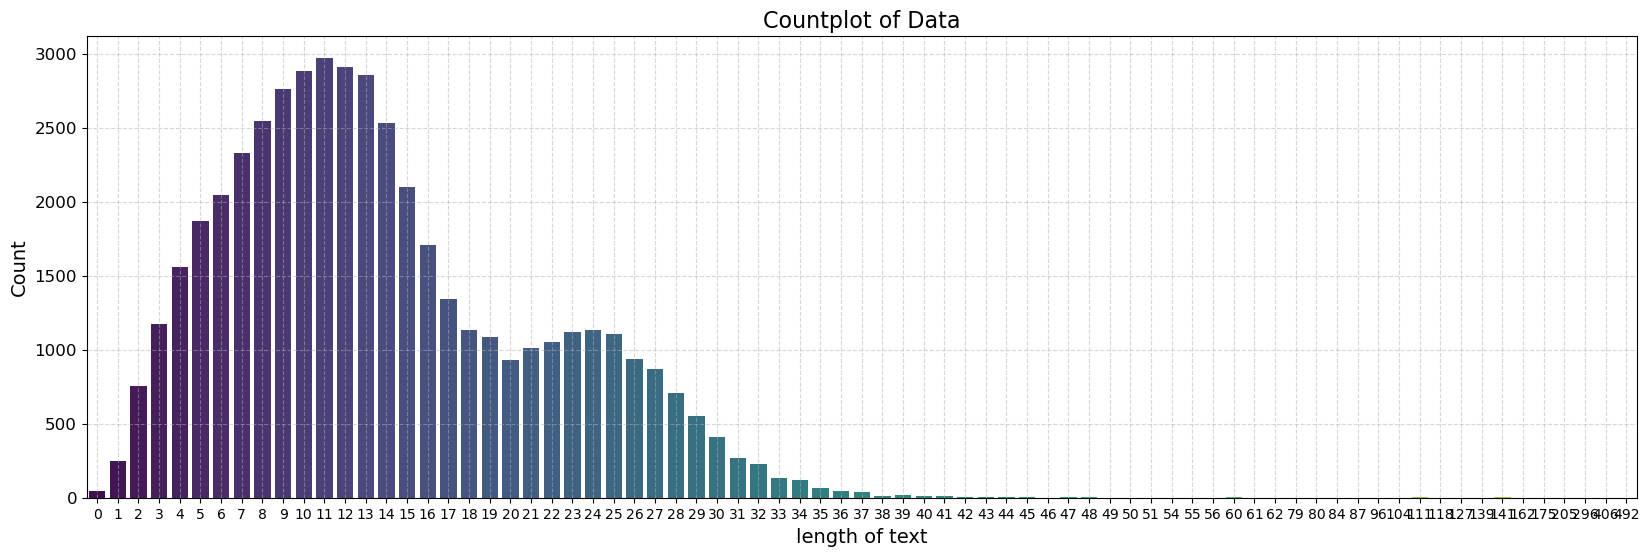

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

sns.set_palette("pastel")

ax = sns.countplot(x=lengths, palette="viridis")


ax.set_xlabel("length of text", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Countplot of Data", fontsize=16)


ax.tick_params(axis='x')
ax.tick_params(axis='y', labelsize=12)


ax.grid(True, linestyle='--', alpha=0.5)


plt.show()


In [459]:
# Pad the sequences to the correct length
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_padded = pad_sequences(df['sequences'], maxlen=14, padding='post', truncating='post')


In [460]:
len(sequences_padded[20])

14

In [461]:
df

,tweet_text,cyberbullying_type,cleaned_text,sequences
0,"In other words #katandandre, your food was cra...",3,"[word, katandandr, food, crapilici, mkr]","[93, 2199, 645, 18603, 26]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,3,"[aussietv, white, mkr, theblock, imacelebritya...","[18595, 32, 26, 18119, 8421, 169, 18107, 5026,..."
2,@XochitlSuckkks a classy whore? Or more red ve...,3,"[xochitlsuckkk, classi, whore, red, velvet, cu...","[18675, 2005, 1216, 776, 9832, 4461]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3,"[jason, gio, meh, p, thank, head, concern, ano...","[2145, 4838, 3236, 164, 174, 222, 859, 176, 71..."
4,@RudhoeEnglish This is an ISIS account pretend...,3,"[rudhoeenglish, isi, account, pretend, kurdish...","[10673, 112, 365, 820, 2824, 365, 3, 28, 191]"
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1,"[black, ppl, expect, anyth, depend, anyth, yet...","[23, 156, 513, 74, 1441, 74, 267, 370, 2038, 1..."
47688,Turner did not withhold his disappointment. Tu...,1,"[turner, withhold, disappoint, turner, call, c...","[7353, 9648, 1414, 7353, 15, 1390, 8933, 33660..."
47689,I swear to God. This dumb nigger bitch. I have...,1,"[swear, god, dumb, nigger, bitch, got, bleach,...","[756, 120, 7, 4, 30, 38, 2867, 311, 40987, 572..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,"[yea, fuck, rt, therealexel, your, nigger, fuc...","[977, 2, 14, 15415, 1413, 4, 2, 1437, 2, 7, 4]"


### Split the data into training and test sets

In [462]:

X_train, X_test, y_train, y_test = train_test_split(sequences_padded, y, test_size=0.2, random_state=42)

# vanilla rnn

In [463]:



rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(model.wv), output_dim=300, weights=[embedding_matrix], input_length=14, trainable=False))
rnn_model.add(SimpleRNN(128))
rnn_model.add(Dense(6))
rnn_model.add(Activation("softmax"))


rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


rnn_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)


Epoch 1/5
1193/1193 - 10s - loss: 0.7437 - accuracy: 0.7048 - val_loss: 0.7021 - val_accuracy: 0.7351 - 10s/epoch - 8ms/step
Epoch 2/5
1193/1193 - 7s - loss: 0.6119 - accuracy: 0.7549 - val_loss: 0.6307 - val_accuracy: 0.7513 - 7s/epoch - 6ms/step
Epoch 3/5
1193/1193 - 7s - loss: 0.5840 - accuracy: 0.7653 - val_loss: 0.6109 - val_accuracy: 0.7640 - 7s/epoch - 6ms/step
Epoch 4/5
1193/1193 - 7s - loss: 0.5724 - accuracy: 0.7710 - val_loss: 0.5838 - val_accuracy: 0.7752 - 7s/epoch - 6ms/step
Epoch 5/5
1193/1193 - 7s - loss: 0.5531 - accuracy: 0.7780 - val_loss: 0.5925 - val_accuracy: 0.7647 - 7s/epoch - 6ms/step


In [464]:
loss, accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
vanilla_accuracy=accuracy
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.7646504044532776


In [465]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt


y_pred = rnn_model.predict(X_test)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


report = classification_report(y_test_labels, y_pred_labels)
print(report)


299/299 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1603
           1       0.97      0.91      0.94      1603
           2       0.95      0.67      0.79      1531
           3       0.64      0.32      0.43      1624
           4       0.48      0.91      0.63      1612
           5       0.93      0.86      0.90      1566

    accuracy                           0.76      9539
   macro avg       0.81      0.77      0.76      9539
weighted avg       0.81      0.76      0.76      9539



## GRU

In [318]:


GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=len(model.wv), output_dim=300, weights=[embedding_matrix], input_length=14, trainable=False))
GRU_model.add(SpatialDropout1D(0.2))
GRU_model.add(GRU(128,return_sequences=True))
GRU_model.add(Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform"))
GRU_model.add(GlobalMaxPooling1D())
GRU_model.add(Dense(6))
GRU_model.add(Activation("softmax"))


In [319]:

GRU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
GRU_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)


Epoch 1/5
1193/1193 - 47s - loss: 0.6116 - accuracy: 0.7535 - val_loss: 0.5280 - val_accuracy: 0.7879 - 47s/epoch - 40ms/step
Epoch 2/5
1193/1193 - 21s - loss: 0.5000 - accuracy: 0.7963 - val_loss: 0.4934 - val_accuracy: 0.8060 - 21s/epoch - 18ms/step
Epoch 3/5
1193/1193 - 35s - loss: 0.4720 - accuracy: 0.8087 - val_loss: 0.4897 - val_accuracy: 0.8108 - 35s/epoch - 29ms/step
Epoch 4/5
1193/1193 - 19s - loss: 0.4481 - accuracy: 0.8167 - val_loss: 0.4711 - val_accuracy: 0.8150 - 19s/epoch - 16ms/step
Epoch 5/5
1193/1193 - 17s - loss: 0.4299 - accuracy: 0.8243 - val_loss: 0.4697 - val_accuracy: 0.8165 - 17s/epoch - 14ms/step


In [320]:
loss, accuracy = GRU_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
GRU_accuracy=accuracy


Test Accuracy: 0.8165426254272461


In [321]:

y_pred = GRU_model.predict(X_test)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


report = classification_report(y_test_labels, y_pred_labels)
print(report)

299/299 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1603
           1       0.96      0.96      0.96      1603
           2       0.84      0.82      0.83      1531
           3       0.74      0.43      0.55      1624
           4       0.58      0.84      0.69      1612
           5       0.91      0.93      0.92      1566

    accuracy                           0.82      9539
   macro avg       0.83      0.82      0.81      9539
weighted avg       0.83      0.82      0.81      9539



## Biderectional LSTM

In [466]:

from tensorflow.keras.models import Sequential

sequential_model = Sequential()
sequential_model.add(Embedding(input_dim=len(model.wv), output_dim=300, weights=[embedding_matrix], input_length=14, trainable=False))
sequential_model.add(SpatialDropout1D(0.2))
sequential_model.add(Bidirectional(LSTM(128, return_sequences=True)))
sequential_model.add(Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform"))
sequential_model.add(GlobalMaxPooling1D())
sequential_model.add(Dense(6))
sequential_model.add(Activation("softmax"))


In [467]:

sequential_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
sequential_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)


Epoch 1/5
1193/1193 - 72s - loss: 0.6031 - accuracy: 0.7590 - val_loss: 0.5234 - val_accuracy: 0.7943 - 72s/epoch - 61ms/step
Epoch 2/5
1193/1193 - 69s - loss: 0.4943 - accuracy: 0.7984 - val_loss: 0.4982 - val_accuracy: 0.8036 - 69s/epoch - 57ms/step
Epoch 3/5
1193/1193 - 53s - loss: 0.4636 - accuracy: 0.8101 - val_loss: 0.4680 - val_accuracy: 0.8144 - 53s/epoch - 45ms/step
Epoch 4/5
1193/1193 - 50s - loss: 0.4444 - accuracy: 0.8166 - val_loss: 0.4580 - val_accuracy: 0.8193 - 50s/epoch - 42ms/step
Epoch 5/5
1193/1193 - 51s - loss: 0.4225 - accuracy: 0.8263 - val_loss: 0.4657 - val_accuracy: 0.8127 - 51s/epoch - 42ms/step


In [468]:
loss, accuracy = sequential_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
bid_accuracy=accuracy

Test Accuracy: 0.8126637935638428


In [325]:

y_pred = sequential_model.predict(X_test)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


report = classification_report(y_test_labels, y_pred_labels)
print(report)

299/299 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1603
           1       0.97      0.94      0.95      1603
           2       0.83      0.84      0.83      1531
           3       0.53      0.75      0.62      1624
           4       0.71      0.38      0.50      1612
           5       0.93      0.91      0.92      1566

    accuracy                           0.79      9539
   macro avg       0.81      0.80      0.79      9539
weighted avg       0.81      0.79      0.79      9539



### ANN MODEL

In [328]:
ann_model = Sequential()
ann_model.add(Embedding(input_dim=len(model.wv), output_dim=300, weights=[embedding_matrix], input_length=14, trainable=False))
ann_model.add(Flatten())

ann_model.add(Dense(128, activation='relu'))


ann_model.add(Dropout(0.5))


ann_model.add(Dense(6, activation='softmax'))

ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [329]:

ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)
loss, accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
ann_accuracy=accuracy


Epoch 1/5
1193/1193 - 4s - loss: 0.8101 - accuracy: 0.6838 - val_loss: 0.6052 - val_accuracy: 0.7617 - 4s/epoch - 3ms/step
Epoch 2/5
1193/1193 - 3s - loss: 0.6581 - accuracy: 0.7366 - val_loss: 0.5810 - val_accuracy: 0.7720 - 3s/epoch - 3ms/step
Epoch 3/5
1193/1193 - 3s - loss: 0.6269 - accuracy: 0.7459 - val_loss: 0.5637 - val_accuracy: 0.7746 - 3s/epoch - 3ms/step
Epoch 4/5
1193/1193 - 3s - loss: 0.6064 - accuracy: 0.7548 - val_loss: 0.5690 - val_accuracy: 0.7726 - 3s/epoch - 3ms/step
Epoch 5/5
1193/1193 - 3s - loss: 0.5885 - accuracy: 0.7590 - val_loss: 0.5739 - val_accuracy: 0.7747 - 3s/epoch - 2ms/step
Test Accuracy: 0.7747143507003784


### LSTM MODEL

In [330]:
lstm_model = Sequential()


lstm_model.add(Embedding(input_dim=len(model.wv), output_dim=300, weights=[embedding_matrix], input_length=14, trainable=False))


lstm_model.add(LSTM(128))


lstm_model.add(Dense(6))
lstm_model.add(Activation("softmax"))


lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [331]:

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)
loss, accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
lstm_accuracy=accuracy


Epoch 1/5
1193/1193 - 16s - loss: 0.6211 - accuracy: 0.7483 - val_loss: 0.5336 - val_accuracy: 0.7835 - 16s/epoch - 13ms/step
Epoch 2/5
1193/1193 - 15s - loss: 0.4967 - accuracy: 0.7949 - val_loss: 0.4956 - val_accuracy: 0.7925 - 15s/epoch - 12ms/step
Epoch 3/5
1193/1193 - 16s - loss: 0.4645 - accuracy: 0.8067 - val_loss: 0.4868 - val_accuracy: 0.7982 - 16s/epoch - 13ms/step
Epoch 4/5
1193/1193 - 15s - loss: 0.4447 - accuracy: 0.8144 - val_loss: 0.4791 - val_accuracy: 0.8090 - 15s/epoch - 13ms/step
Epoch 5/5
1193/1193 - 14s - loss: 0.4271 - accuracy: 0.8218 - val_loss: 0.4560 - val_accuracy: 0.8169 - 14s/epoch - 12ms/step
Test Accuracy: 0.816857099533081


## Comparison

In [491]:
x_labels=[vanilla_accuracy,GRU_accuracy,bid_accuracy,ann_accuracy,lstm_accuracy]
y_labels=["Vanilla_RNN","GRU","Bidirec-LSTM","ANN","LSTM"]
colors=['red','green','blue']
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=y_labels, y=x_labels,marker_color="orange")])
fig.update_layout(
    title="Accuracy of Models",
    xaxis_title="Models",
    yaxis_title="Accuracy"
)

fig.show()

## Conclusion
- The improved performance of the GRU and Bidirectional LSTM models over the Vanilla RNN suggests that the architecture of the recurrent neural network is a critical factor for the cyberbullying detection task. GRU and Bidirectional LSTM models have more complex architectures that allow them to capture dependencies in the text more effectively. The Bidirectional LSTM, which processes the input text in both forward and backward directions, provides a more comprehensive understanding of the context, which likely contributed to its slightly superior performance.

# Q-2

## Problem Staement
- Develop a multi-class text classification model for Financial Sentiment Analysis. The goal is to classify financial documents, such as news articles, tweets, or reports, into predefined categories that represent the sentiment or tone of the content, such as "positive," "negative," or "neutral." The model should effectively identify and categorize the sentiment in financial texts, aiding investors, analysts, and financial institutions in making informed decisions based on real-time sentiment analysis.

## About Dataset
- The following data is intended for advancing financial sentiment analysis research. It's two datasets (FiQA, Financial PhraseBank) combined into one easy-to-use CSV file. It provides financial sentences with sentiment labels.
- https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

## Methodology

### Obtaining Dataset

### Splitting Data into training and testing 

### Data Augumentation on Training Data

### Data Preprocessing
  - Special Characters removal
  - Stemming and Lemitization
  - Tokenization
  - word 2 vec using Gensim library
  
### Creating embedding matrix

### Finding words position in vocabulary and applying paddding

### Encoding Cyberbullying_type 


### Model Building
  - Vanilla rnn
  - LSTM
  - GRU
  - Bidirectional LSTM
  
###  Model Comparison


In [470]:
data=pd.read_csv('data.csv')
data


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


## EDA 

In [334]:
all_texts=' '.join(data['Sentence'])
all_texts=re.sub('[^a-zA-Z0-9?$%]',' ',all_texts)
words=all_texts.split()
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]


In [335]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('The', 1309),
 ('EUR', 1192),
 ('company', 763),
 ('mn', 729),
 ('1', 590),
 ('Finnish', 539),
 ('profit', 535),
 ('sales', 519),
 ('said', 511),
 ('%', 502),
 ('million', 488),
 ('year', 477),
 ('2', 459),
 ('net', 436),
 ('3', 429),
 ('5', 418),
 ('4', 364),
 ('2009', 358),
 ('0', 354),
 ('mln', 351),
 ('2008', 350),
 ('quarter', 341),
 ('Finland', 339),
 ('period', 335),
 ('6', 316),
 ('2007', 306),
 ('7', 291),
 ('8', 285),
 ('share', 281),
 ('9', 279),
 ('co', 277),
 ('2010', 257),
 ('$', 254),
 ('new', 248),
 ('Oyj', 240),
 ('first', 239),
 ('000', 234),
 ('In', 232),
 ('market', 226),
 ('loss', 215),
 ('shares', 209),
 ('business', 208),
 ('operating', 201),
 ('2006', 198),
 ('compared', 195),
 ('also', 194),
 ('today', 187),
 ('Group', 180),
 ('euro', 174),
 ('Operating', 170),
 ('10', 169),
 ('services', 161),
 ('corresponding', 158),
 ('Helsinki', 156),
 ('per', 155),
 ('group', 150),
 ('percent', 148),
 ('operations', 145),
 ('total', 140),
 ('http', 139),
 ('contract', 13

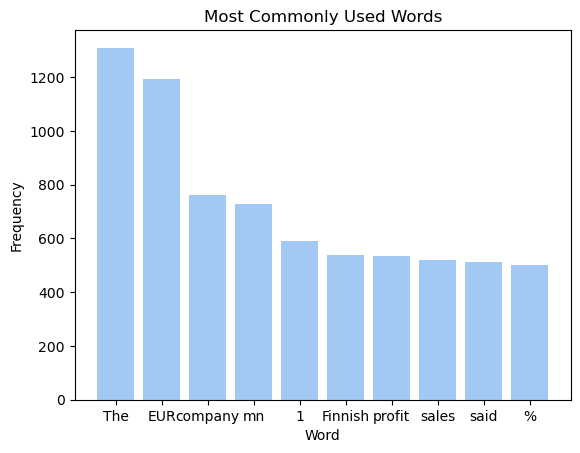

In [336]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

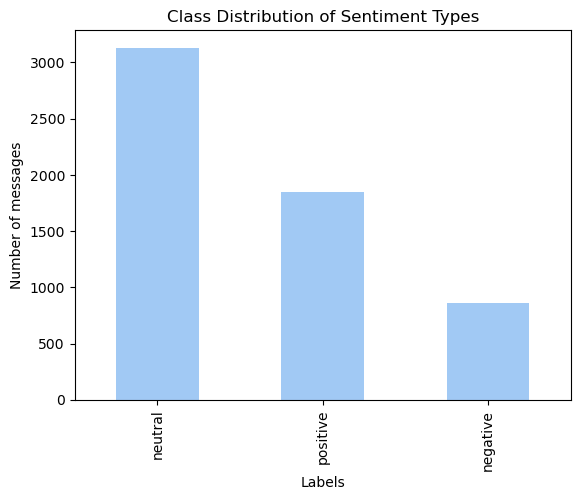

In [337]:
class_counts = data['Sentiment'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Sentiment Types')
plt.xlabel('Labels')
plt.ylabel('Number of messages')
plt.show()

## Data Preprocessing

In [339]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
def clean(text):
    text=re.sub('[^a-zA-Z0-9?.$%]',' ',text)
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    return words
    
    
    

In [340]:
data['cleanedtext']=data['Sentence'].apply(clean)

In [341]:
data

,Sentence,Sentiment,cleanedtext
0,The GeoSolutions technology will leverage Bene...,positive,"[the, geosolut, technolog, leverag, benefon, g..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[$, esi, low, $, 1.50, $, 2.50, bk, real, poss..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[for, last, quarter, 2010, componenta, net, sa..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[accord, finnish, russian, chamber, commerc, m..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[the, swedish, buyout, firm, sold, remain, 22...."
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,"[rise, cost, forc, packag, produc, huhtamaki, ..."
5838,Nordic Walking was first used as a summer trai...,neutral,"[nordic, walk, first, use, summer, train, meth..."
5839,"According shipping company Viking Line , the E...",neutral,"[accord, ship, compani, vike, line, eu, decis,..."
5840,"In the building and home improvement trade , s...",neutral,"[in, build, home, improv, trade, sale, decreas..."


### Word 2 vec

In [342]:
from gensim.models import Word2Vec


model = Word2Vec(sentences=data['cleanedtext'], vector_size=300, window=5, min_count=1, workers=4, sg=1)




In [343]:
similar_words = model.wv.most_similar('quarter', topn=5)
similar_words

[('half', 0.9871945381164551),
 ('fourth', 0.9774666428565979),
 ('third', 0.977461040019989),
 ('2008', 0.973557710647583),
 ('april', 0.9723542928695679)]

### Createing embedding matrix

In [344]:
model.wv.index_to_key


['.',
 '$',
 'the',
 'eur',
 'compani',
 'mn',
 'oper',
 'sale',
 'profit',
 '%',
 'finnish',
 'year',
 'share',
 'said',
 'net',
 'million',
 '2009',
 'mln',
 'quarter',
 '2008',
 'market',
 'new',
 'finland',
 'period',
 'group',
 'total',
 '2007',
 'product',
 'servic',
 'busi',
 'http',
 'euro',
 '2010',
 'oyj',
 'first',
 'in',
 'loss',
 '000',
 'increas',
 'compar',
 'report',
 'also',
 'today',
 '2006',
 'develop',
 'price',
 'includ',
 'helsinki',
 'contract',
 'bank',
 '1',
 'correspond',
 'expect',
 'invest',
 'unit',
 'manufactur',
 'base',
 'per',
 'solut',
 'result',
 'percent',
 'stock',
 'decreas',
 'industri',
 'corpor',
 'order',
 'manag',
 'provid',
 'system',
 'financi',
 'plant',
 'custom',
 'stks.co',
 't.co',
 'month',
 '10',
 'technolog',
 'accord',
 'nokia',
 '2005',
 'hel',
 'mobil',
 'build',
 'end',
 'project',
 'capit',
 'long',
 'valu',
 'pct',
 'third',
 'use',
 'well',
 'start',
 'continu',
 '2',
 'second',
 'plan',
 'earlier',
 'it',
 'one',
 'a',
 'janu

In [345]:
embedding_matrix = np.zeros((len(model.wv), 300))
for i,word in enumerate(model.wv.index_to_key):
    embedding_matrix[i]=model.wv[word]

In [346]:
embedding_matrix

array([[ 0.08680844,  0.14751117,  0.09662943, ..., -0.19946869,
         0.15408345, -0.0917621 ],
       [ 0.22740065,  0.19801491,  0.12686147, ..., -0.34148806,
         0.42216727, -0.30853564],
       [ 0.09277637,  0.19766037, -0.08010889, ..., -0.02491454,
         0.01391681,  0.0502221 ],
       ...,
       [ 0.01632202,  0.04514016, -0.0070703 , ..., -0.03555856,
         0.02963611, -0.00397648],
       [ 0.0174238 ,  0.04545058, -0.01079816, ..., -0.03590748,
         0.02846352,  0.00346945],
       [ 0.0078912 ,  0.03896748, -0.00658999, ..., -0.02133865,
         0.01329939,  0.00613438]])

### Word position in vocabulary

In [347]:
word_to_index = model.wv.key_to_index

In [348]:
def indexfinder(row):
    sentence=[]
    for word in row:
        index = word_to_index[word]
        sentence.append(index)
        
    return sentence
        


data["sequences"]=data["cleanedtext"].apply(indexfinder)


In [349]:
data


,Sentence,Sentiment,cleanedtext,sequences
0,The GeoSolutions technology will leverage Bene...,positive,"[the, geosolut, technolog, leverag, benefon, g...","[2, 3513, 76, 3260, 1284, 1969, 58, 67, 344, 5..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[$, esi, low, $, 1.50, $, 2.50, bk, real, poss...","[1, 5202, 320, 1, 3527, 1, 5249, 3464, 184, 1007]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[for, last, quarter, 2010, componenta, net, sa...","[605, 102, 18, 32, 649, 14, 7, 594, 5397, 5383..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[accord, finnish, russian, chamber, commerc, m...","[77, 10, 379, 3588, 2167, 244, 105, 4, 22, 6, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[the, swedish, buyout, firm, sold, remain, 22....","[2, 277, 1255, 423, 439, 221, 3583, 60, 189, 7..."
...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,"[rise, cost, forc, packag, produc, huhtamaki, ...","[318, 133, 1160, 472, 231, 856, 1778, 973, 411..."
5838,Nordic Walking was first used as a summer trai...,neutral,"[nordic, walk, first, use, summer, train, meth...","[310, 3261, 34, 90, 903, 1046, 850, 965, 173, ..."
5839,"According shipping company Viking Line , the E...",neutral,"[accord, ship, compani, vike, line, eu, decis,...","[77, 307, 4, 993, 124, 853, 576, 353, 69, 832, 0]"
5840,"In the building and home improvement trade , s...",neutral,"[in, build, home, improv, trade, sale, decreas...","[35, 82, 551, 199, 149, 7, 62, 4033, 9, 3, 487..."


In [350]:
data.drop('Sentence',axis=1,inplace=True)

data

## Padding 

### Checking optimal Length to pad

In [351]:
lengths=[]
for text in data['cleanedtext']:
    x=len(text)
    lengths.append(x)

In [352]:

Counter(lengths)

Counter({23: 128,
         10: 376,
         12: 385,
         17: 293,
         6: 174,
         9: 404,
         27: 58,
         13: 390,
         20: 170,
         11: 428,
         26: 85,
         5: 101,
         18: 254,
         8: 354,
         15: 323,
         14: 363,
         22: 122,
         3: 17,
         24: 91,
         7: 291,
         19: 198,
         21: 136,
         4: 41,
         16: 283,
         29: 60,
         31: 34,
         33: 22,
         34: 9,
         38: 5,
         32: 34,
         25: 75,
         28: 69,
         30: 41,
         36: 5,
         40: 3,
         2: 3,
         35: 10,
         1: 1,
         39: 3,
         49: 2,
         37: 1})

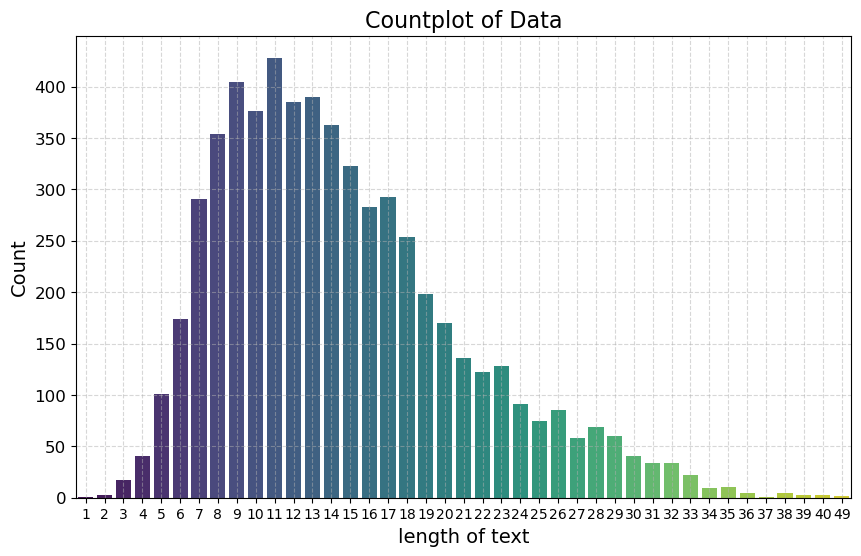

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Set the color palette
sns.set_palette("pastel")

ax = sns.countplot(x=lengths, palette="viridis")


ax.set_xlabel("length of text", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Countplot of Data", fontsize=16)

ax.tick_params(axis='x')
ax.tick_params(axis='y', labelsize=12)


ax.grid(True, linestyle='--', alpha=0.5)


plt.show()


In [354]:
# Pad the sequences to the correct length
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_padded = pad_sequences(data['sequences'], maxlen=14, padding='post', truncating='post')


###  Encoding  target variable

In [355]:
from sklearn.preprocessing import LabelEncoder
# Encode the labels
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

In [356]:
label_to_integer_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_to_integer_mapping)


{'negative': 0, 'neutral': 1, 'positive': 2}


In [357]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(data['Sentiment'])
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

## Train-test split

In [358]:

X_train, X_test, y_train, y_test = train_test_split(sequences_padded, y, test_size=0.2, random_state=42)

## Model Building

## vanila Rnn

In [359]:
from tensorflow.keras.layers import Dropout

seq_model = Sequential()
seq_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
seq_model.add(Dropout(0.2))
seq_model.add(SimpleRNN(units=32))

seq_model.add(Dense(3, activation='softmax'))

seq_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [360]:
seq_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
147/147 - 2s - loss: 0.9580 - accuracy: 0.5553 - val_loss: 0.8755 - val_accuracy: 0.6108 - 2s/epoch - 13ms/step
Epoch 2/5
147/147 - 1s - loss: 0.9070 - accuracy: 0.5934 - val_loss: 0.8984 - val_accuracy: 0.6176 - 734ms/epoch - 5ms/step
Epoch 3/5
147/147 - 1s - loss: 0.8855 - accuracy: 0.6026 - val_loss: 0.8449 - val_accuracy: 0.6228 - 695ms/epoch - 5ms/step
Epoch 4/5
147/147 - 1s - loss: 0.8702 - accuracy: 0.5988 - val_loss: 0.8775 - val_accuracy: 0.6091 - 696ms/epoch - 5ms/step
Epoch 5/5
147/147 - 1s - loss: 0.8735 - accuracy: 0.6020 - val_loss: 0.8392 - val_accuracy: 0.6279 - 704ms/epoch - 5ms/step


In [361]:
loss, accuracy = seq_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy ",accuracy)
van_acc=accuracy


Test Accuracy  0.6278870701789856


## LSTM 

In [362]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(128))

LSTM_model.add(Dense(3, activation='softmax'))

LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [363]:
LSTM_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
147/147 - 4s - loss: 0.9127 - accuracy: 0.5804 - val_loss: 0.8459 - val_accuracy: 0.6168 - 4s/epoch - 28ms/step
Epoch 2/5
147/147 - 2s - loss: 0.8793 - accuracy: 0.5998 - val_loss: 0.8396 - val_accuracy: 0.6176 - 2s/epoch - 11ms/step
Epoch 3/5
147/147 - 2s - loss: 0.8723 - accuracy: 0.6039 - val_loss: 0.8418 - val_accuracy: 0.6193 - 2s/epoch - 12ms/step
Epoch 4/5
147/147 - 2s - loss: 0.8594 - accuracy: 0.6067 - val_loss: 0.8371 - val_accuracy: 0.6168 - 2s/epoch - 13ms/step
Epoch 5/5
147/147 - 2s - loss: 0.8542 - accuracy: 0.6116 - val_loss: 0.8330 - val_accuracy: 0.6159 - 2s/epoch - 13ms/step


In [364]:
loss, accuracy = LSTM_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy ",accuracy)
Lstm_acc=accuracy

Test Accuracy  0.6159110069274902


## GRU 

In [365]:
GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
GRU_model.add(SpatialDropout1D(0.2))
GRU_model.add(GRU(128))

GRU_model.add(Dense(3, activation='softmax'))

GRU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [366]:
GRU_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
147/147 - 5s - loss: 0.9400 - accuracy: 0.5637 - val_loss: 0.8738 - val_accuracy: 0.6185 - 5s/epoch - 37ms/step
Epoch 2/5
147/147 - 2s - loss: 0.8819 - accuracy: 0.5985 - val_loss: 0.8540 - val_accuracy: 0.6253 - 2s/epoch - 11ms/step
Epoch 3/5
147/147 - 2s - loss: 0.8737 - accuracy: 0.5949 - val_loss: 0.8910 - val_accuracy: 0.5774 - 2s/epoch - 11ms/step
Epoch 4/5
147/147 - 2s - loss: 0.8724 - accuracy: 0.5979 - val_loss: 0.8408 - val_accuracy: 0.6193 - 2s/epoch - 11ms/step
Epoch 5/5
147/147 - 2s - loss: 0.8559 - accuracy: 0.6129 - val_loss: 0.8222 - val_accuracy: 0.6287 - 2s/epoch - 14ms/step


In [367]:
loss, accuracy = GRU_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy ",accuracy)
gru_acc=accuracy

Test Accuracy  0.628742516040802


## Bidirectional LSTM

In [368]:
Bid_model = Sequential()
Bid_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
Bid_model.add(Dropout(0.2))

Bid_model.add(Bidirectional(LSTM(128)))

Bid_model.add(Dense(3, activation='softmax'))

Bid_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [369]:
Bid_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
147/147 - 9s - loss: 0.9100 - accuracy: 0.5938 - val_loss: 0.8507 - val_accuracy: 0.6168 - 9s/epoch - 61ms/step
Epoch 2/5
147/147 - 8s - loss: 0.8679 - accuracy: 0.6013 - val_loss: 0.8316 - val_accuracy: 0.6159 - 8s/epoch - 56ms/step
Epoch 3/5
147/147 - 7s - loss: 0.8610 - accuracy: 0.6045 - val_loss: 0.8318 - val_accuracy: 0.6262 - 7s/epoch - 49ms/step
Epoch 4/5
147/147 - 5s - loss: 0.8553 - accuracy: 0.6041 - val_loss: 0.8402 - val_accuracy: 0.6108 - 5s/epoch - 36ms/step
Epoch 5/5
147/147 - 7s - loss: 0.8456 - accuracy: 0.6127 - val_loss: 0.8325 - val_accuracy: 0.6176 - 7s/epoch - 45ms/step


In [370]:
loss, accuracy = Bid_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy ",accuracy)
bid_acc=accuracy

Test Accuracy  0.617621898651123


In [371]:
x_labels=[van_acc,Lstm_acc,gru_acc,bid_acc]
y_labels=["Vanilla_RNN","LSTM","GRU","Bidirec-LSTM"]
colors=['red','green','blue']
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=y_labels, y=x_labels,marker_color="orange")])
fig.update_layout(
    title="Accuracy of Models",
    xaxis_title="Models",
    yaxis_title="Accuracy"
)

fig.show()

## Q2 with data Augumentation

In [372]:
data=pd.read_csv('data.csv')
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [373]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [374]:
train_data

,Sentence,Sentiment
1647,The floor area of the Yliopistonrinne project ...,neutral
1669,"no compensation for its news , opinions or dis...",neutral
3159,RT @ACInvestorBlog $AAPL still on track for $500,positive
4577,This includes a EUR 39.5 mn change in the fair...,neutral
4221,$GTE LONG at 7.44,positive
...,...,...
3772,@BULLYA @pollux654321 My 50 $KORS 80 Calls are...,positive
5191,"According to Sepp+ñnen , the new technology UM...",positive
5226,$CRUS Upgraded to a buy by Alpha Street Research,positive
5390,Favourable currency rates also contributed to ...,positive


## Data Augumentation

In [375]:
import pandas as pd
from textaugment import Wordnet


wordnet_augmenter = Wordnet()


def synonym_replacement(text):
    return wordnet_augmenter.augment(text)






In [376]:
'''data_augmented = train_data.copy()
data_augmented['Sentence'] = data_augmented['Sentence'].apply(synonym_replacement)
train_data = train_data.append(data_augmented, ignore_index=True)

train_data.reset_index(drop=True, inplace=True)
'''


"data_augmented = train_data.copy()\ndata_augmented['Sentence'] = data_augmented['Sentence'].apply(synonym_replacement)\ntrain_data = train_data.append(data_augmented, ignore_index=True)\n\ntrain_data.reset_index(drop=True, inplace=True)\n"

In [377]:
'''train_data'''

'train_data'

In [378]:
'''train_data.to_excel('traindataset2.xlsx', index=False, engine='openpyxl')'''

"train_data.to_excel('traindataset2.xlsx', index=False, engine='openpyxl')"

In [379]:
'''test_data.to_excel('testdata2.xlsx', index=False, engine='openpyxl')'''

"test_data.to_excel('testdata2.xlsx', index=False, engine='openpyxl')"

In [380]:
testdata = pd.read_excel('testdata2.xlsx', engine='openpyxl')
testdata

,Sentence,Sentiment
0,A few employees would remain at the Oulu plant...,neutral
1,Comparable net sales are expected to increase ...,positive
2,"Tesla is recalling 2,700 Model X cars: https:/...",negative
3,Finnish software developer Done Solutions Oyj ...,positive
4,Compagnie de Financement Foncier - Is to issue...,neutral
...,...,...
1164,"In 2010 , the Marimekko Group s net sales were...",neutral
1165,Nokia said it still expects to sell 150 more m...,neutral
1166,"PNC, Goldman Sachs Receive Dividend Hike Green...",positive
1167,"The company , employing 6,400 , reported net s...",neutral


In [381]:
traindata = pd.read_excel('traindataset2.xlsx', engine='openpyxl')
traindata

,Sentence,Sentiment
0,The floor area of the Yliopistonrinne project ...,neutral
1,"no compensation for its news , opinions or dis...",neutral
2,RT @ACInvestorBlog $AAPL still on track for $500,positive
3,This includes a EUR 39.5 mn change in the fair...,neutral
4,$GTE LONG at 7.44,positive
...,...,...
9341,@bullya @pollux654321 my 50 $kors 80 calls are...,positive
9342,"accord to sepp+ñnen , the new technology umts9...",positive
9343,$crus upgraded to a buy by alpha street research,positive
9344,favourable currency rates also contributed to ...,positive


## EDA

In [382]:
all_texts=' '.join(traindata['Sentence'])
all_texts=re.sub('[^a-zA-Z0-9?$%]',' ',all_texts)
words=all_texts.split()
stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]


In [383]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
def clean(text):
    text=re.sub('[^a-zA-Z0-9?.$%]',' ',text)
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    return words
    
    
    

In [384]:
traindata['cleanedtext']=traindata['Sentence'].apply(clean)

In [385]:
testdata['cleanedtext']=testdata['Sentence'].apply(clean)

In [386]:
traindata

,Sentence,Sentiment,cleanedtext
0,The floor area of the Yliopistonrinne project ...,neutral,"[the, floor, area, yliopistonrinn, project, 7,..."
1,"no compensation for its news , opinions or dis...",neutral,"[compens, news, opinion, distribut, .]"
2,RT @ACInvestorBlog $AAPL still on track for $500,positive,"[rt, acinvestorblog, $, aapl, still, track, $,..."
3,This includes a EUR 39.5 mn change in the fair...,neutral,"[thi, includ, eur, 39.5, mn, chang, fair, valu..."
4,$GTE LONG at 7.44,positive,"[$, gte, long, 7.44]"
...,...,...,...
9341,@bullya @pollux654321 my 50 $kors 80 calls are...,positive,"[bullya, pollux654321, 50, $, kor, 80, call, g..."
9342,"accord to sepp+ñnen , the new technology umts9...",positive,"[accord, sepp, nen, new, technolog, umts900, s..."
9343,$crus upgraded to a buy by alpha street research,positive,"[$, cru, upgrad, buy, alpha, street, research]"
9344,favourable currency rates also contributed to ...,positive,"[favour, currenc, rate, also, contribut, highe..."


In [387]:
testdata

,Sentence,Sentiment,cleanedtext
0,A few employees would remain at the Oulu plant...,neutral,"[a, employe, would, remain, oulu, plant, suppo..."
1,Comparable net sales are expected to increase ...,positive,"[compar, net, sale, expect, increas, 10, %, 20..."
2,"Tesla is recalling 2,700 Model X cars: https:/...",negative,"[tesla, recal, 2, 700, model, x, car, http, t...."
3,Finnish software developer Done Solutions Oyj ...,positive,"[finnish, softwar, develop, done, solut, oyj, ..."
4,Compagnie de Financement Foncier - Is to issue...,neutral,"[compagni, de, financ, foncier, is, issu, benc..."
...,...,...,...
1164,"In 2010 , the Marimekko Group s net sales were...",neutral,"[in, 2010, marimekko, group, net, sale, eur, 7..."
1165,Nokia said it still expects to sell 150 more m...,neutral,"[nokia, said, still, expect, sell, 150, millio..."
1166,"PNC, Goldman Sachs Receive Dividend Hike Green...",positive,"[pnc, goldman, sach, receiv, dividend, hike, g..."
1167,"The company , employing 6,400 , reported net s...",neutral,"[the, compani, employ, 6, 400, report, net, sa..."


In [388]:
from gensim.models import Word2Vec


model = Word2Vec(sentences=traindata['cleanedtext'], vector_size=300, window=5, min_count=1, workers=4, sg=1)




In [389]:
similar_words = model.wv.most_similar('quarter', topn=5)
similar_words

[('half', 0.9526964426040649),
 ('99.5', 0.9039949774742126),
 ('fourth', 0.9002610445022583),
 ('eur3m', 0.895332396030426),
 ('third', 0.895143449306488)]

In [390]:
embedding_matrix = np.zeros((len(model.wv), 300))
for i,word in enumerate(model.wv.index_to_key):
    embedding_matrix[i]=model.wv[word]

In [391]:
embedding_matrix

array([[-0.03933627,  0.06811275,  0.06097104, ..., -0.12555334,
         0.23320264,  0.10281062],
       [-0.07157937,  0.60818756,  0.04960661, ..., -0.14428258,
         0.01815648,  0.07559963],
       [ 0.13657026,  0.19199803,  0.12709334, ...,  0.26562741,
         0.40628844, -0.03506819],
       ...,
       [ 0.01353226,  0.02269233, -0.00287782, ..., -0.01345976,
         0.02993304, -0.01034242],
       [ 0.04224454,  0.03854689, -0.00410317, ..., -0.04414758,
         0.06092807, -0.00468469],
       [ 0.0208823 ,  0.01909496, -0.00081164, ..., -0.0152101 ,
         0.03216558, -0.01033037]])

### Word position in vocabulary

In [392]:
word_to_index = model.wv.key_to_index
def indexfinder(row):
    sentence=[]
    for word in row:
        index = word_to_index[word]
        sentence.append(index)
        
    return sentence
        


traindata["sequences"]=traindata["cleanedtext"].apply(indexfinder)


### padding

In [393]:
# Pad the sequences to the correct length
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_padded = pad_sequences(traindata['sequences'], maxlen=14, padding='post', truncating='post')


#  Encoding  target variable

In [394]:
from sklearn.preprocessing import LabelEncoder
# Encode the labels
label_encoder = LabelEncoder()
traindata['Sentiment'] = label_encoder.fit_transform(traindata['Sentiment'])

In [395]:
testdata['Sentiment']=label_encoder.transform(testdata['Sentiment'])

In [396]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(traindata['Sentiment'])
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [397]:
y_test=to_categorical(testdata['Sentiment'])
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [398]:
word_to_index = model.wv.key_to_index
def indexfinder(row):
    sentence = []
    
    for word in row:
        index = word_to_index.get(word, -1)
        if index != -1: 
            sentence.append(index)
    return sentence


In [399]:
testdata["sequences"] = testdata["cleanedtext"].apply(indexfinder)
testdata_padded = pad_sequences(testdata['sequences'], maxlen=14, padding='post', truncating='post')


In [400]:
testdata_padded

array([[ 271,  140,  129, ...,    0,    0,    0],
       [  38,   14,    6, ...,    0,    0,    0],
       [ 898,  720,   99, ...,    0,    0,    0],
       ...,
       [1339, 1336,  432, ...,   73,    2,    2],
       [   5,    3,  340, ...,    2,   16,   43],
       [1139,  361,   23, ...,    0,    0,    0]])

## Model


## Vanilla RNN

In [401]:
from tensorflow.keras.layers import Dropout

seq_model = Sequential()
seq_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
seq_model.add(Dropout(0.2))
seq_model.add(SimpleRNN(units=32))

seq_model.add(Dense(3, activation='softmax'))

seq_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [402]:
seq_model.fit(sequences_padded, y, batch_size=32, epochs=5, validation_data=(testdata_padded, y_test), verbose=2)

Epoch 1/5
293/293 - 3s - loss: 0.9155 - accuracy: 0.5763 - val_loss: 0.8466 - val_accuracy: 0.6228 - 3s/epoch - 10ms/step
Epoch 2/5
293/293 - 1s - loss: 0.8613 - accuracy: 0.6087 - val_loss: 0.8529 - val_accuracy: 0.6236 - 1s/epoch - 5ms/step
Epoch 3/5
293/293 - 1s - loss: 0.8529 - accuracy: 0.6158 - val_loss: 0.8268 - val_accuracy: 0.6279 - 1s/epoch - 5ms/step
Epoch 4/5
293/293 - 1s - loss: 0.8398 - accuracy: 0.6191 - val_loss: 0.8175 - val_accuracy: 0.6236 - 1s/epoch - 5ms/step
Epoch 5/5
293/293 - 1s - loss: 0.8366 - accuracy: 0.6235 - val_loss: 0.8302 - val_accuracy: 0.6322 - 1s/epoch - 5ms/step


In [403]:
loss, accuracy = seq_model.evaluate(testdata_padded, y_test, verbose=0)
print("Test Accuracy ",accuracy)
va_acc=accuracy


Test Accuracy  0.6321642398834229


In [404]:

y_pred = seq_model.predict(testdata_padded)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


report = classification_report(y_test_labels, y_pred_labels)
print(report)

37/37 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.17      0.01      0.01       175
           1       0.65      0.95      0.77       622
           2       0.58      0.39      0.47       372

    accuracy                           0.63      1169
   macro avg       0.46      0.45      0.42      1169
weighted avg       0.55      0.63      0.56      1169



## Lstm

In [405]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(128))

LSTM_model.add(Dense(3, activation='softmax'))

LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [406]:
LSTM_model.fit(sequences_padded, y, batch_size=32, epochs=5, validation_data=(testdata_padded, y_test), verbose=2)

Epoch 1/5
293/293 - 7s - loss: 0.8724 - accuracy: 0.6074 - val_loss: 0.8096 - val_accuracy: 0.6416 - 7s/epoch - 24ms/step
Epoch 2/5
293/293 - 4s - loss: 0.8384 - accuracy: 0.6172 - val_loss: 0.8020 - val_accuracy: 0.6339 - 4s/epoch - 12ms/step
Epoch 3/5
293/293 - 3s - loss: 0.8272 - accuracy: 0.6295 - val_loss: 0.8086 - val_accuracy: 0.6433 - 3s/epoch - 11ms/step
Epoch 4/5
293/293 - 4s - loss: 0.8149 - accuracy: 0.6293 - val_loss: 0.7795 - val_accuracy: 0.6467 - 4s/epoch - 13ms/step
Epoch 5/5
293/293 - 5s - loss: 0.8012 - accuracy: 0.6388 - val_loss: 0.7792 - val_accuracy: 0.6536 - 5s/epoch - 16ms/step


In [407]:
loss, accuracy = LSTM_model.evaluate(testdata_padded, y_test, verbose=0)
print("Test Accuracy ",accuracy)
Lstm_accu=accuracy

Test Accuracy  0.6535500288009644


In [408]:

y_pred = LSTM_model.predict(testdata_padded)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


report = classification_report(y_test_labels, y_pred_labels)
print(report)

37/37 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.23      0.04      0.07       175
           1       0.70      0.89      0.79       622
           2       0.58      0.55      0.56       372

    accuracy                           0.65      1169
   macro avg       0.50      0.49      0.47      1169
weighted avg       0.59      0.65      0.61      1169



### Bidirectional LSTM

In [409]:
Bid_model = Sequential()
Bid_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
Bid_model.add(Dropout(0.2))

Bid_model.add(Bidirectional(LSTM(128)))

Bid_model.add(Dense(3, activation='softmax'))

Bid_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [410]:
Bid_model.fit(sequences_padded, y, batch_size=32, epochs=5, validation_data=(testdata_padded, y_test), verbose=2)

Epoch 1/5
293/293 - 26s - loss: 0.8699 - accuracy: 0.6042 - val_loss: 0.8056 - val_accuracy: 0.6313 - 26s/epoch - 88ms/step
Epoch 2/5
293/293 - 17s - loss: 0.8230 - accuracy: 0.6272 - val_loss: 0.7824 - val_accuracy: 0.6527 - 17s/epoch - 58ms/step
Epoch 3/5
293/293 - 21s - loss: 0.8087 - accuracy: 0.6337 - val_loss: 0.7747 - val_accuracy: 0.6424 - 21s/epoch - 73ms/step
Epoch 4/5
293/293 - 26s - loss: 0.7898 - accuracy: 0.6427 - val_loss: 0.7782 - val_accuracy: 0.6493 - 26s/epoch - 88ms/step
Epoch 5/5
293/293 - 24s - loss: 0.7720 - accuracy: 0.6484 - val_loss: 0.7688 - val_accuracy: 0.6570 - 24s/epoch - 82ms/step


In [411]:
loss, accuracy = Bid_model.evaluate(testdata_padded, y_test, verbose=0)
print("Test Accuracy ",accuracy)
bid_acc=accuracy

Test Accuracy  0.6569717526435852


In [412]:

y_pred = Bid_model.predict(testdata_padded)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


report = classification_report(y_test_labels, y_pred_labels)
print(report)

37/37 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.33      0.04      0.07       175
           1       0.68      0.91      0.78       622
           2       0.61      0.52      0.56       372

    accuracy                           0.66      1169
   macro avg       0.54      0.49      0.47      1169
weighted avg       0.61      0.66      0.60      1169



## GRU

In [413]:
GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=len(model.wv), output_dim=300, input_length=14, weights=[embedding_matrix], trainable=False))
GRU_model.add(SpatialDropout1D(0.2))
GRU_model.add(GRU(128))

GRU_model.add(Dense(3, activation='softmax'))

GRU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [414]:
GRU_model.fit(sequences_padded, y, batch_size=32, epochs=5, validation_data=(testdata_padded, y_test), verbose=2)

Epoch 1/5
293/293 - 8s - loss: 0.8869 - accuracy: 0.5928 - val_loss: 0.8334 - val_accuracy: 0.6116 - 8s/epoch - 27ms/step
Epoch 2/5
293/293 - 5s - loss: 0.8461 - accuracy: 0.6146 - val_loss: 0.8151 - val_accuracy: 0.6279 - 5s/epoch - 17ms/step
Epoch 3/5
293/293 - 5s - loss: 0.8282 - accuracy: 0.6299 - val_loss: 0.7963 - val_accuracy: 0.6450 - 5s/epoch - 16ms/step
Epoch 4/5
293/293 - 4s - loss: 0.8156 - accuracy: 0.6385 - val_loss: 0.8137 - val_accuracy: 0.6296 - 4s/epoch - 15ms/step
Epoch 5/5
293/293 - 5s - loss: 0.8076 - accuracy: 0.6391 - val_loss: 0.8123 - val_accuracy: 0.6339 - 5s/epoch - 17ms/step


In [415]:
loss, accuracy = GRU_model.evaluate(testdata_padded, y_test, verbose=0)
print("Test Accuracy ",accuracy)
gru_accu=accuracy


Test Accuracy  0.6338751316070557


In [416]:

y_pred = GRU_model.predict(testdata_padded)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


report = classification_report(y_test_labels, y_pred_labels)
print(report)

37/37 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.17      0.01      0.01       175
           1       0.71      0.81      0.76       622
           2       0.52      0.63      0.57       372

    accuracy                           0.63      1169
   macro avg       0.47      0.48      0.45      1169
weighted avg       0.57      0.63      0.59      1169



In [417]:
x_labels=[va_acc,Lstm_accu,gru_accu,bid_acc]
y_labels=["Vanilla_RNN","LSTM","GRU","Bidirec-LSTM"]
colors=['red','green','blue']
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=y_labels, y=x_labels,marker_color="orange")])
fig.update_layout(
    title="Accuracy of Models",
    xaxis_title="Models",
    yaxis_title="Accuracy"
)

fig.show()

## Conclusion

- After applying Data augumentation Model performance increased slightly and acuuracy  increased from 0.61 to 0.65 ,but since we used synonym replacement for data augumentation cannot genrate more data even i tried with 75k data ther results are same .Tried to use pre trained model BERT but computation time is more. So out of all the models LSTM and Bidirectional LSTM is performing better. As there is not much difference in between LSTM and bidirectioanl lstm accuracy wecan use LSTM.

## Pretrained model BERT 
- but as computational time is more unable to run it

In [495]:
'''from transformers import BertTokenizer, BertForSequenceClassification
import torch

model_name = 'yiyanghkust/finbert-tone'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=1).item()
    return prediction
'''


'from transformers import BertTokenizer, BertForSequenceClassification\nimport torch\n\nmodel_name = \'yiyanghkust/finbert-tone\'\ntokenizer = BertTokenizer.from_pretrained(model_name)\nmodel = BertForSequenceClassification.from_pretrained(model_name)\ndef get_sentiment(text):\n    inputs = tokenizer(text, return_tensors="pt")\n    outputs = model(**inputs)\n    prediction = torch.argmax(outputs.logits, dim=1).item()\n    return prediction\n'

In [494]:
'''
training_data,testing_data = train_test_split(data, test_size=0.2, random_state=42)'''

'\ntraining_data,testing_data = train_test_split(data, test_size=0.2, random_state=42)'

In [493]:

'''training_data['predicted_sentiment'] = training_data['Sentence'].apply(get_sentiment)
testing_data['predicted_sentiment'] = testing_data['Sentence'].apply(get_sentiment)'''


"training_data['predicted_sentiment'] = training_data['Sentence'].apply(get_sentiment)\ntesting_data['predicted_sentiment'] = testing_data['Sentence'].apply(get_sentiment)"

In [492]:
'''from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_df['actual_sentiment'], train_df['predicted_sentiment'])
test_accuracy = accuracy_score(test_df['actual_sentiment'], test_df['predicted_sentiment'])

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")'''


'from sklearn.metrics import accuracy_score\n\ntrain_accuracy = accuracy_score(train_df[\'actual_sentiment\'], train_df[\'predicted_sentiment\'])\ntest_accuracy = accuracy_score(test_df[\'actual_sentiment\'], test_df[\'predicted_sentiment\'])\n\nprint(f"Training accuracy: {train_accuracy}")\nprint(f"Test accuracy: {test_accuracy}")'